# Using Isolation Forests as kernels for SVM

This is a short example about using the [isotree](https://www.github.com/david-cortes/isotree) library for fitting an isolation forest model and using this (unsupervised) fitted model for calculating the similarities between each pair of observations, which in turn can be used as a kernel for SVM (support vector machines) for supervised learning tasks.

By default, the library calculates a distance metric between observations which is bounded between zero and one. Having these bounds, it can be easily turned into a similarity metric by simply calculating one minus this distance. This similarity metric satisfies the properties of a Hilbert space (https://en.wikipedia.org/wiki/Hilbert_space), being possible to use it as a kernel for support vector machines or as a feature generator.

The library includes a function `set_reference_points` which can be used for repeated distance calculations against the same points. Note that this is however a typically very slow and memory-heavy operation, and as such is not recommended for large datasets.

The example uses the "splice scale" dataset, which can be downloaded from [LibSVM dataset](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/). Note that, despite being offered in a sparse matrix format, the data is actually dense.

---

### Reading the data


In [11]:
from readsparse import read_sparse

splice = read_sparse("splice_scale.txt")
y = (splice["y"] == 1).astype("float64")
X = splice["X"].toarray()
X = X[:, 0:2]
print(X.shape)


(1000, 2)


In [12]:
print(y.shape)

(1000,)


## Defining a kernel transformer from isolation forest


In [13]:
print(y)

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.

In [14]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
# use seaborn plotting defaults 
import seaborn as sns; sns.set() 

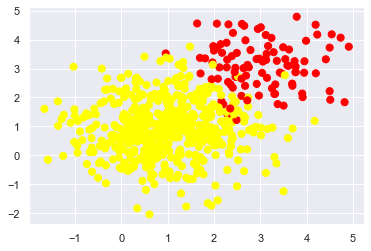

In [67]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=[100, 500], centers=[[3,3], [1,1]], 
                 random_state=0, cluster_std=[0.80, 1.0]) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); 


In [68]:
print(X.shape)
print(y.shape)

(600, 2)
(600,)


In [333]:
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.metrics.pairwise import laplacian_kernel

model = SVC(kernel='linear', C=1E10) 
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [334]:
model.decision_function

<bound method BaseSVC.decision_function of SVC(C=10000000000.0, kernel='linear')>

In [335]:
model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8],
       [4.9, 2.4],
       [6.6, 2.9],
       [6.7, 3.1],
       [5.6, 3. ],
       [6.2, 2.2],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.4, 3. ],
       [6.7, 3.1],
       [5.6, 3. ],
       [5.5, 2.5],
       [6.1, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [6.3, 3.3],
       [5.8, 2.7],
       [6.3, 2.9],
       [6.5, 3. ],
       [4.9, 2.5],
       [6.5, 3.2],
       [5.8, 2.8],
       [6.4, 3.2],
       [6.5, 3. ],
       [6. , 2.2],
       [6.9, 3.2],
       [5.6, 2.8],
       [6.3, 2.7],
       [7.2, 3. ],
       [6.3, 2.8],
       [5.8, 2.7],
       [6.3, 2.5],
       [6.5, 3. ],
       [5.9, 3. ]])

In [336]:
model.decision_function

<bound method BaseSVC.decision_function of SVC(C=10000000000.0, kernel='linear')>

In [331]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
   """Plot the decision function for a 2D SVC""" 
   if ax is None: 
       ax = plt.gca() # Get the current Axes instance on the current figure mat ching the given keyword args, or create one. 
   xlim = ax.get_xlim() 
   ylim = ax.get_ylim() 
    
   # create grid to evaluate model 
   x = np.linspace(xlim[0], xlim[1], 30) 
   y = np.linspace(ylim[0], ylim[1], 30) 
   Y, X = np.meshgrid(y, x) # 30 x 30 each 
   xy = np.vstack([X.ravel(), Y.ravel()]).T # 900 x 2 
   print("size of xy", xy.shape) 
    
   P = model.decision_function(xy).reshape(X.shape) #model.decision_function(xy) return 900 x 1 
   # Returns the decision function of the sample for each class in the model 
   print("size of P", P.shape) # 30 x 30 
   # plot decision boundary and margins   #  draw contour lines 
   ax.contour(X, Y, P, colors='k', 
              levels=[-1, 0, 1], alpha=0.5, 
              linestyles=['--', '-', '--']) 
    
   # plot support vectors 
   if plot_support: 
       ax.scatter(model.support_vectors_[:, 0], 
                  model.support_vectors_[:, 1], 
                  s=50, linewidth=1, facecolors='Blue'); 
   ax.set_xlim(xlim) 
   ax.set_ylim(ylim) 

size of xy (900, 2)


ValueError: cannot reshape array of size 2700 into shape (30,30)

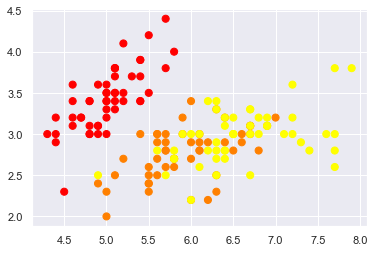

In [332]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function(model);

In [344]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics.pairwise import laplacian_kernel

iris_data = load_iris()

X = iris_data.data[:, :2]
y = iris_data.target
h = 0.02

# K = 1.0 - iso.predict_distance(X, use_reference_points=True)
K = laplacian_kernel(X,gamma=.5)
print(K)
svm = SVC(kernel='precomputed').fit(K, y)

[[1.         0.70468809 0.70468809 ... 0.38674102 0.54881164 0.52204578]
 [0.70468809 1.         0.81873075 ... 0.44932896 0.42741493 0.60653066]
 [0.70468809 0.81873075 1.         ... 0.36787944 0.42741493 0.4965853 ]
 ...
 [0.38674102 0.44932896 0.36787944 ... 1.         0.70468809 0.74081822]
 [0.54881164 0.42741493 0.42741493 ... 0.70468809 1.         0.70468809]
 [0.52204578 0.60653066 0.4965853  ... 0.74081822 0.70468809 1.        ]]


In [345]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_test = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

xx,yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [347]:
x_test = np.vstack([xx.ravel(),yy.ravel()]).T

K_test = laplacian_kernel(x_test, X,  gamma=.5)
Z = svm.predict(K_test)
Z = Z.reshape(xx.shape)

(150,)


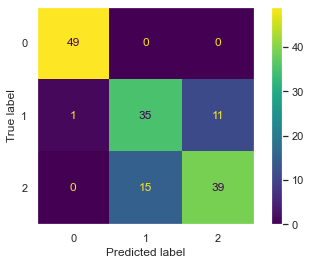

In [349]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Z1 = svm.predict(K)
print(Z1.shape)
cm = confusion_matrix(Z1, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()
plt.grid(False)
plt.show()
# print(Z1)
# print(y)

(1.0, 5.380000000000004)

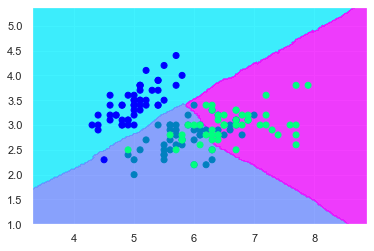

In [302]:
plt.contourf(xx, yy, Z, cmap=plt.cm.cool, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [75]:
from isotree import IsolationForest
from sklearn.base import TransformerMixin, BaseEstimator


class IsoDistKernel(TransformerMixin, BaseEstimator):
    def __init__(self, isotree_params: dict = {}):
        self.isotree_params = isotree_params

    def fit(self, X, y=None, sample_weights=None):
        self.iso_ = IsolationForest(**self.isotree_params)
        self.iso_.fit(X).set_reference_points(X, with_distances=True)
        return self

    def transform(self, X):
        D = self.iso_.predict_distance(X, use_reference_points=True)
        return 1 - D


# Evaluating results with this kernel

Note that while typically most SVM libraries manually calculate a set of predefined kernels, software such as LibSVM (and by extension scikit-learn which uses it behind the hood) or ThunderSVM allow passing a precomputed kernel as data instead of the original points, which is a square matrix with dimension equal to the number of observations.

The results here are evaluated by a randomized and stratified 5-fold cross-validation.


In [76]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from pprint import pprint

model = make_pipeline(
    IsoDistKernel(
        {"ndim": 1, "sample_size": 256, "ntrees": 250, "missing_action": "fail"}
    ),
    SVC(kernel="precomputed"),
)
cv_res_iso = cross_validate(
    estimator=model,
    X=X,
    y=y,
    scoring="roc_auc",
    n_jobs=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
)
print("Cross-validation results (distance isolation kernel):")
pprint(cv_res_iso)
print("----")
print("Mean CV AUROC: %.4f" % cv_res_iso["test_score"].mean())


Cross-validation results (distance isolation kernel):
{'fit_time': array([0.10379696, 0.08725548, 0.08275962, 0.07018161, 0.07418704]),
 'score_time': array([0.02309585, 0.01905489, 0.02479601, 0.01502895, 0.02256966]),
 'test_score': array([0.999, 0.985, 0.99 , 0.998, 0.989])}
----
Mean CV AUROC: 0.9922


A natural question is how good was the addition of this kernel compared to something simpler. As will be seen, results are better with the isolation kernel than with the default Gaussian RBF kernel used by this library:


In [77]:
### Compare against a simpler kernel
from sklearn.metrics.pairwise import laplacian_kernel


cv_res_plain_kernel = cross_validate(
    estimator=SVC(kernel='lap'),
    X=X,
    y=y,
    scoring="roc_auc",
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
)
print("Cross-validation results (default RBF kernel):")
pprint(cv_res_plain_kernel)
print("----")
print("Mean CV AUROC: %.4f" % cv_res_plain_kernel["test_score"].mean())


Cross-validation results (default RBF kernel):
{'fit_time': array([0.00400615, 0.0035789 , 0.0056107 , 0.0050838 , 0.0060823 ]),
 'score_time': array([0.00383687, 0.00324726, 0.00299883, 0.00350738, 0.0035181 ]),
 'test_score': array([1.    , 0.981 , 0.976 , 0.9865, 0.987 ])}
----
Mean CV AUROC: 0.9861


## More efficient calculation for fitted model

While the input to the model is a kernel matrix with number of columns corresponding to the number of observations to which it was fitted, in practice SVM models only end up using a fraction of the total observations in their prediction formula (these are the so-called "support vectors").

As such, once one has a fitted model and wants to make predictions on new data, it is not necessary (nor beneficial) to calculate distances from the new observations to every single point that was in the training data - only distances with respect to support vectors are needed.

The software used here (scikit-learn) unfortunately does not have any option for automatically telling the model methods to "shrink" their input requirements, but it is nevertheless easy to re-create the formula manually:


In [158]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=200)

In [295]:
iso = IsolationForest().fit(X).set_reference_points(X, with_distances=True)
K = 1 - iso.predict_distance(X, use_reference_points=True)
svm = SVC(kernel="precomputed").fit(K, y)
print(K.shape)
p_auto = svm.decision_function(K[:10]).reshape(-1)
print("Prediction from automated call to 'decision_function':")
print(p_auto)

(150, 150)
Prediction from automated call to 'decision_function':
[ 2.24520911  0.83050211 -0.212032    2.21093592  1.03980108 -0.21674092
  2.23754481  0.89312095 -0.2225148   2.23661039  0.90553708 -0.22407283
  2.24855317  0.81682914 -0.21041917  2.23853303 -0.18968641  0.8184814
  2.24366446  0.85467164 -0.22012322  2.24206766  0.84742806 -0.2146371
  2.22220791  0.95400959 -0.21594424  2.22349073  0.96921845 -0.21968039]


d:\anaconda3\lib\site-packages\isotree\__init__.py:1910: UserWarning: Model was meant to take 3 variables for each split, but data has 2 columns. Will decrease number of splitting variables to match number of columns.
  warnings.warn(msg)


In [276]:
print(K)
# plt.scatter(K[:, 0], K[:, 1], c=y, s=50, cmap='autumn');

[[0.96721908 0.70290422 0.7544651  ... 0.5334835  0.64299901 0.62499025]
 [0.70290422 0.96542196 0.84276438 ... 0.55956531 0.59133234 0.69938269]
 [0.7544651  0.84276438 0.96522968 ... 0.48665523 0.55310742 0.61417996]
 ...
 [0.5334835  0.55956531 0.48665523 ... 0.96767039 0.74615847 0.82983574]
 [0.64299901 0.59133234 0.55310742 ... 0.74615847 0.96200377 0.76068214]
 [0.62499025 0.69938269 0.61417996 ... 0.82983574 0.76068214 0.96715085]]


In [277]:
sv = [X[t] for t in svm.support_]
sv = np.array(sv)
print(sv)

[[4.9 3. ]
 [4.4 2.9]
 [4.8 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.7 3.8]
 [5.4 3.4]
 [5.1 3.3]
 [5.  3. ]
 [5.4 3.4]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.5 2.3]
 [4.8 3. ]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [6.1 3. ]
 [5.8 2.6]
 [5.  2.3]
 [5.7 3. ]
 [5.7 2.9]
 [6.2 2.9]
 [5.1 2.5]
 [5.7 2.8]
 [6.3 3.3]
 [5.8 2.7]
 [7.1 3. ]
 [6.3 2.9]
 [6.5 3. ]
 [4.9 2.5]
 [6.7 2.5]
 [7.2 3.6]
 [6.5 3.2]
 [6.4 2.7]
 [6.8 3. ]
 [5.7 2.5]
 [5.8 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [7.7 3.8]
 [7.7 2.6]
 [6.  2.2]
 [6.9 3.2]
 [5.6 2.8]
 [6.3 2.7]
 [6.2 2.8]
 [6.1 3. ]
 [6.4 2.8]
 [7.9 3.8]
 [6.4 2.8]
 [6.3 2.8]
 [6.1 2.6]
 [6.3 3.4]
 [6.4 3.1]
 [6.  3. ]
 [6.9 3.1]

In [288]:
idx_used = svm.support_
print("Number of reference points picked: %d" % idx_used.shape[0])
iso.set_reference_points(X[idx_used], with_distances=True)
K_used = 1.0 - iso.predict_distance(X[:10], use_reference_points=True)
p_manual = K_used.dot(svm.dual_coef_.reshape(-1,2)) + svm.intercept_[0]
print("Prediction from manual formula using only selected reference points:")
print(p_manual)


Number of reference points picked: 99
(10, 99)
Prediction from manual formula using only selected reference points:
[[-0.35883464 -0.14451553]
 [-0.65343675  0.27113589]
 [-0.25032723  0.19397085]
 [-0.18088457  0.36930187]
 [-0.15832215 -0.04673246]
 [-0.09003574  0.09320714]
 [-0.02394782  0.17740309]
 [-0.36744392 -0.1344589 ]
 [ 0.07985545  0.87567585]
 [-0.60672168  0.04838764]]


In [289]:
x1 = np.array(X[0:10])
K_used1 = 1.0 - iso.predict_distance(x1, use_reference_points=True)
p_manual1 = K_used1.dot(svm.dual_coef_.reshape(-1,2)) + svm.intercept_[0]
print("Prediction from manual formula using only selected reference points:")
print(p_manual1)

Prediction from manual formula using only selected reference points:
[[-0.35883464 -0.14451553]
 [-0.65343675  0.27113589]
 [-0.25032723  0.19397085]
 [-0.18088457  0.36930187]
 [-0.15832215 -0.04673246]
 [-0.09003574  0.09320714]
 [-0.02394782  0.17740309]
 [-0.36744392 -0.1344589 ]
 [ 0.07985545  0.87567585]
 [-0.60672168  0.04838764]]


In [291]:
def plot_svc_decision_function_2(model, sv, ax=None, plot_support=True): 
    """Plot the decision function for a 2D SVC""" 
    if ax is None: 
        ax = plt.gca() # Get the current Axes instance on the current figure mat ching the given keyword args, or create one. 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 

    # create grid to evaluate model 
    x = np.linspace(xlim[0], xlim[1], 20) 
    y = np.linspace(ylim[0], ylim[1], 20) 
    Y, X = np.meshgrid(y, x) # 30 x 30 each 
    xy = np.vstack([X.ravel(), Y.ravel()]).T # 900 x 2 
    print("size of xy", xy.shape)

    K_used = 1.0 - iso.predict_distance(xy, use_reference_points=True)
    p_manual = K_used.dot(svm.dual_coef_.reshape(-1,2)) + svm.intercept_[0]
    print(p_manual.shape)
    
    # P = model.decision_function(xy).reshape(X.shape) #model.decision_function(xy) return 900 x 1 
    P = p_manual.reshape(X.shape)
    # Returns the decision function of the sample for each class in the model 
    print("size of P", P.shape) # 30 x 30 
    # plot decision boundary and margins   #  draw contour lines 
    ax.contour(X, Y, P, colors='k', 
                levels=[-1, 0, 1], alpha=0.5, 
                linestyles=['--', '-', '--']) 

    # plot support vectors 
    if plot_support: 
        ax.scatter(sv[:, 0], 
                    sv[:, 1], 
                    s=100, linewidth=1, facecolors='Blue'); 
    ax.set_xlim(xlim) 
    ax.set_ylim(ylim) 

size of xy (400, 2)
(400, 2)


ValueError: cannot reshape array of size 800 into shape (20,20)

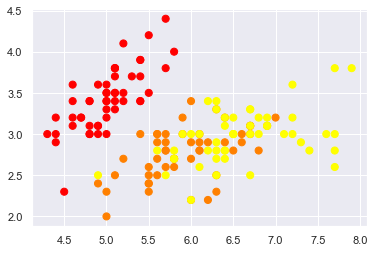

In [292]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function_2(svm, sv)

## Sub-sampled kernel

While SVM models typically involve efficient optimization routines for square kernel matrices which end up identifying the best reference points (support vectors) to use in the final prediction formula, it is also possible to use the trick with a plain generalized linear model such as logistic regression by instead supplying features that are the kernels with respect to randomly-sampled points within the data.

This is faster to calculate as a kernel, but typically the results are not as good quality as when using a full square matrix, since the support vectors are randomly-chosen.


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np


class IsoSubSampledDistKernel(TransformerMixin, BaseEstimator):
    def __init__(self, isotree_params: dict = {}, n_samples=250, random_state=None):
        self.isotree_params = isotree_params
        self.n_samples = n_samples
        self.random_state = random_state

    def fit(self, X, y=None, sample_weights=None):
        self.iso_ = IsolationForest(**self.isotree_params)
        self.iso_.fit(X)
        rng = np.random.default_rng(seed=self.random_state)
        idx_random = rng.choice(X.shape[0], size=self.n_samples)
        self.iso_.set_reference_points(X[idx_random], with_distances=True)
        return self

    def transform(self, X):
        D = self.iso_.predict_distance(X, use_reference_points=True)
        return 1 - D


model_subsampled = make_pipeline(
    IsoSubSampledDistKernel(
        {"ndim": 1, "sample_size": 256, "ntrees": 250, "missing_action": "fail"},
        n_samples=250,
        random_state=456,
    ),
    LogisticRegression(solver="lbfgs", max_iter=10000),
)
cv_res_iso_subsampled = cross_validate(
    estimator=model_subsampled,
    X=X,
    y=y,
    scoring="roc_auc",
    n_jobs=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
)
print("Cross-validation results (randomly sub-sampled distance isolation kernel):")
pprint(cv_res_iso_subsampled)
print("----")
print("Mean CV AUROC: %.4f" % cv_res_iso_subsampled["test_score"].mean())


Cross-validation results (randomly sub-sampled distance isolation kernel):
{'fit_time': array([0.09652162, 0.07552147, 0.07251787, 0.06551313, 0.07151604]),
 'score_time': array([0.01500034, 0.01600146, 0.01400042, 0.01299882, 0.0129981 ]),
 'test_score': array([1., 1., 1., 1., 1.])}
----
Mean CV AUROC: 1.0000
